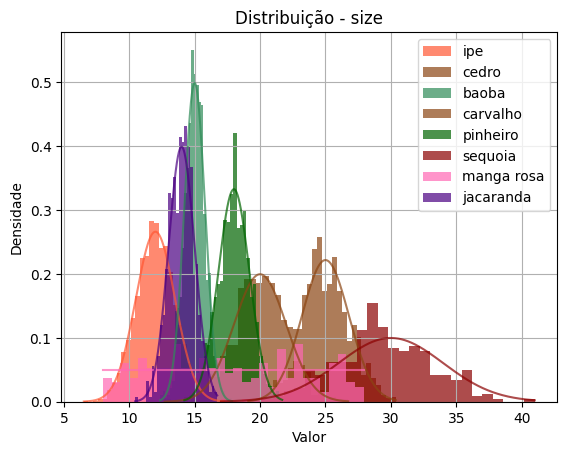

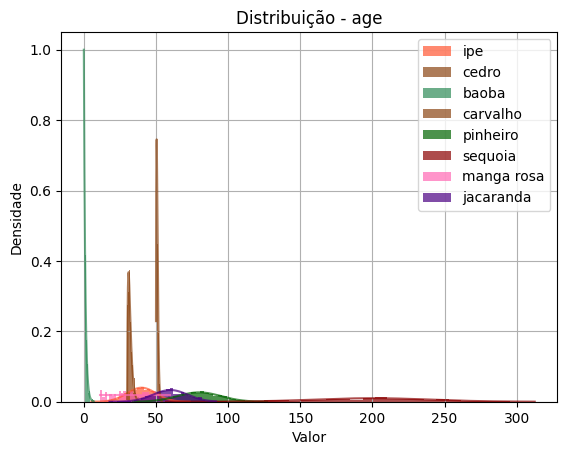

,especie,size,age
0,ipe,14.248737,40.558709
1,ipe,15.373719,29.941187
2,ipe,13.465901,47.318671
3,ipe,14.594322,47.669952
4,ipe,10.326630,24.530084
...,...,...,...
7695,jacaranda,14.497660,63.948865
7696,jacaranda,13.636624,45.000435
7697,jacaranda,14.548924,60.983904
7698,jacaranda,14.038072,68.117723


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, expon, beta, poisson, lognorm, gamma, uniform
# now the weibull distribution
from scipy.stats import weibull_min as weibull

class normal_mixture:
    def __init__(self):
        pass

    def rvs(means, variances, weights, size):
        samples = np.zeros(size)
        nlen = len(means)
        for i in range(size):
            j = np.random.choice(nlen, p=weights)
            samples[i] = np.random.normal(loc=means[j], scale=np.sqrt(variances[j]))
        return samples
    
    def pdf(x, means, variances, weights):
        y = np.zeros_like(x)
        means = np.array(means)
        variances = np.array(variances)
        weights = np.array(weights)

        nlen = len(means)
        # checking if the weights sum to 1
        if np.sum(weights) != 1:
            raise ValueError("The weights must sum to 1")
        # checking if the number of means, variances and weights are the same
        if not (len(means) == len(variances) == len(weights)):
            raise ValueError("The number of means, variances and weights must be the same")
        # checking if the weights are positive
        if np.any(weights < 0):
            raise ValueError("The weights must be positive")
        # checking if the variances are positive
        if np.any(variances < 0):
            raise ValueError("The variances must be positive")
        
        for i in range(nlen):
            y += weights[i] * norm.pdf(x, loc=means[i], scale=np.sqrt(variances[i]))
        return y


# the distributions dict, all must have a .rvs for sampling and .pdf for calculating the probability density
distributions = {
    "normal": norm,
    "expon": expon,
    "beta": beta,
    "poisson": poisson,
    "lognormal": lognorm,
    "gamma": gamma,
    "weibull": weibull,
    "uniform": uniform,
    "normal_mixture": normal_mixture
}

especies = {
    "ipe": {
        "size": (distributions["normal"], (12, 1.5)),
        "age": (distributions["normal"], (40, 10))
    },
    "cedro": {
        "size": (distributions["normal"], (20, 2.0)),
        "age": (distributions["gamma"], (2, 30))
    },
    "baoba": {
        "size": (distributions["normal"], (15, 0.8)),
        "age": (distributions["expon"], (0.02,))
    },
    "carvalho": {
        "size": (distributions["normal"], (25, 1.8)),
        "age": (distributions["weibull"], (1.5, 50))
    },
    "pinheiro": {
        "size": (distributions["normal"], (18, 1.2)),
        "age": (distributions["normal"], (80, 15))
    },
    "sequoia": {
        "size": (distributions["normal"], (30, 4.0)),
        "age": (distributions["normal"], (200, 40))
    },
    "manga rosa": {
        "size": (distributions["uniform"], (8, 20)),
        "age": (distributions["uniform"], (10, 50))
    },
    "jacaranda": {
        "size": (distributions["normal"], (14, 1.0)),
        "age": (distributions["normal"], (60, 12))
    }
}


sample_size = { # Número de pontos a serem amostrados por espécie
    "ipe": 3000,
    "cedro": 600,
    "baoba": 1000,
    "carvalho": 1000,
    "pinheiro": 1000,
    "sequoia": 300,
    "manga rosa": 200,
    "jacaranda": 600
}

species_colors = {
    "ipe":          "#FF5733",  # Laranja
    "baoba":        "#2E8B57",  # Verde
    "cedro":        "#8B4513",  # Marrom
    "pinheiro":     "#006400",  # Verde Escuro
    "carvalho":     "#8B4513",  # Marrom
    "sequoia":      "#8B0000",  # Vermelho Escuro
    "manga rosa":   "#FF69B4",  # Rosa
    "jacaranda":    "#4B0082",  # Índigo
    "other":        "#777777"   # Cinza
}

char_samples = {}

for caracteristica in especies["ipe"].keys():
    plt.figure()
    for especie, caracteristicas in especies.items():
        n_samples = sample_size[especie]
        distribuicao, params = caracteristicas[caracteristica]
        samples = distribuicao.rvs(*params, size=n_samples)

        if char_samples.get(especie) is None:
            char_samples[especie] = {}

        char_samples[especie][caracteristica] = samples
        
        # Plot do histogra
        plt.hist(samples, bins=30, density=True, alpha=0.7, color=species_colors[especie], label=especie)

        # Plot da curva da distribuição
        if distribuicao == poisson:
            x = np.arange(np.min(samples), np.max(samples))
            y = distribuicao.pmf(x, *params)
        else:
            x = np.linspace(np.min(samples), np.max(samples), 1000)
            y = distribuicao.pdf(x, *params)
        plt.plot(x, y, label=None, color=species_colors[especie], alpha=0.7)

    plt.xlabel('Valor')
    plt.ylabel('Densidade')
    plt.title(f"Distribuição - {caracteristica}")
    plt.legend()
    plt.grid(True)
    plt.show()

# Lista vazia para armazenar os DataFrames individuais
dfs = []

# Iterar sobre as chaves e valores do dicionário
for especie, caracteristicas in char_samples.items():
    df_especie = pd.DataFrame(caracteristicas)
    df_especie['especie'] = especie
    dfs.append(df_especie)

# Concatenar os DataFrames em um único DataFrame
df_samples = pd.concat(dfs, ignore_index=True)
# reordenar as colunas
df_samples = df_samples[["especie", "size", "age"]]
df_samples

    


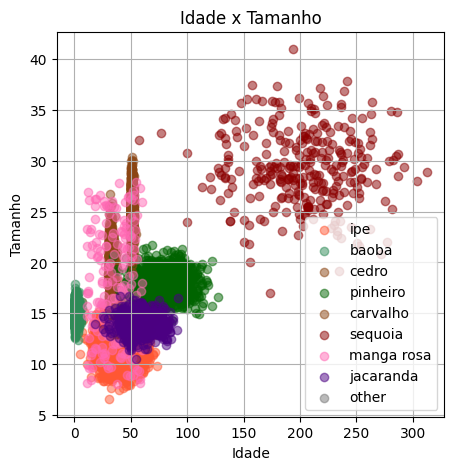

In [32]:
# fazendo scatter plot age x size com os dados do dataframe
plt.figure(figsize=(5, 5))
for especie, color in species_colors.items():
    plt.scatter(df_samples[df_samples["especie"] == especie]["age"], df_samples[df_samples["especie"] == especie]["size"], color=color, alpha=0.5, label=especie)
plt.xlabel("Idade")
plt.ylabel("Tamanho")
plt.title("Idade x Tamanho")
plt.legend()
plt.grid(True)
plt.show()

In [33]:
# salvando o dataframe em um arquivo csv
df_samples.to_csv("tree_samples_all.csv", index=False)

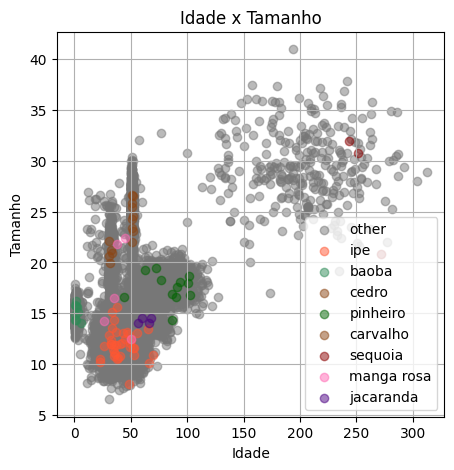

In [34]:
# removendo algumas labels aleatóriamente trocando a especie para "other"
PERCENTAGE_TO_REMOVE = 0.99 # eu quando tenho 1% dos dados anotados: 💀
df_samples["especie"] = df_samples["especie"].apply(lambda x: "0000" if np.random.rand() < PERCENTAGE_TO_REMOVE else x)

# ordena df_samples para que o "other" fique por primeiro
df_samples = df_samples.sort_values(by="especie", ascending=True)

# renomeando o "0000" para "other"
df_samples["especie"] = df_samples["especie"].apply(lambda x: "other" if x == "0000" else x)

# fazendo scatter plot age x size com os dados do dataframe
plt.figure(figsize=(5, 5))

# minha gambiarra pra deixar o "other" por último
for especie, color in species_colors.items():
    if especie=="other": plt.scatter(df_samples[df_samples["especie"] == especie]["age"], df_samples[df_samples["especie"] == especie]["size"], color=color, alpha=0.5, label=especie)
for especie, color in species_colors.items():
    if especie!="other": plt.scatter(df_samples[df_samples["especie"] == especie]["age"], df_samples[df_samples["especie"] == especie]["size"], color=color, alpha=0.5, label=especie)

plt.xlabel("Idade")
plt.ylabel("Tamanho")
plt.title("Idade x Tamanho")
plt.legend()
plt.grid(True)
plt.show()


In [35]:
# salvano os dados em um arquivo csv
df_samples.to_csv("tree_samples_missing_labels.csv", index=False)